In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# **Ex1**

(853, 1280)


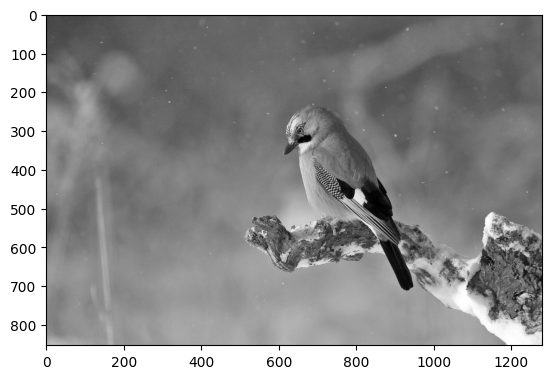

In [11]:
img = cv2.imread('./images/jay-548381_1280.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)
plt.imshow(img, cmap='gray')

2. Выполните дискретное преобразование Фурье. Определите компоненту полученного преобразования, находящуюся на пересечении 322 строки и  597 столбца.

In [27]:
f = np.fft.fft2(img)
f[322][597]

(-1209.3990171392097+266.1080662698812j)

3. Переместите компоненту, отвечающую нулевой частоте f[0][0] , в центр и замените все элементы матрицы их модулями — амплитудами.

In [10]:
f.shape

(853, 1280)

In [12]:
fshift = np.fft.fftshift(f)
# Check this
print(fshift[426][640] == f[0][0])

True


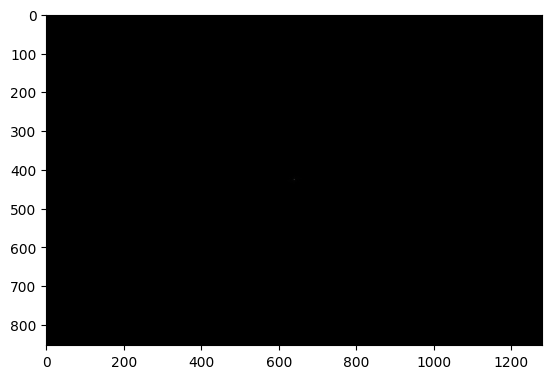

In [14]:
# thay thế tất cả các phần tử của ma trận bằng các mô-đun - biên độ của chúng
magnitude_spectrum = np.abs(fshift)
plt.imshow(magnitude_spectrum, cmap = 'gray')

In [15]:
print('min:', np.min(magnitude_spectrum), 'max:', np.max(magnitude_spectrum))
print(magnitude_spectrum[426][640])

min: 4.204258181072361 max: 134983869.0
134983869.0


4. Примените логарифмическое шкалирование.

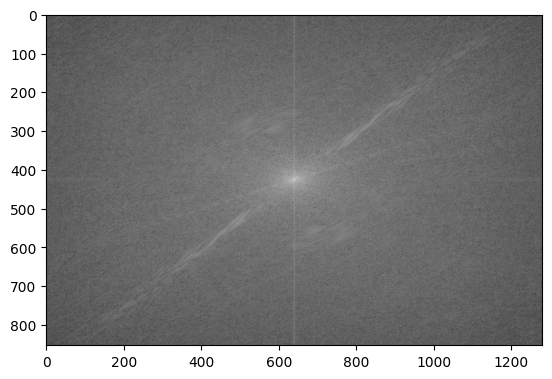

In [16]:
# add 1 for advoid logarit == 0
magnitude_spectrum = np.log(1+np.abs(fshift))
plt.imshow(magnitude_spectrum, cmap = 'gray')

In [18]:
min = np.min(magnitude_spectrum)
max = np.max(magnitude_spectrum)
print(f"max - min = {max-min}")
print(magnitude_spectrum[426][640])

max - min = 17.071188676320006
18.72066584778274


5. Занулите амплитуду основных низких частот — матрица размера 80x80  в центре изображения (плюс/минус 40 пикселей от центра). За точку центра следует выбрать результат целочисленного деления на 2 ширины и высота изображения.

In [21]:
a = (853*2)/1280
a

1.3328125

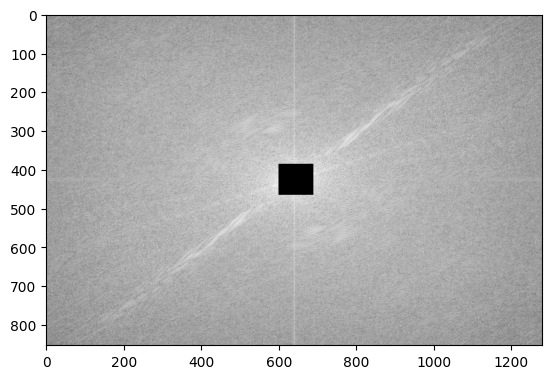

In [28]:
fshift[426 -  40 : 426 + 40, 640-40 : 640 + 50] = 0
fshift[426][640] = 0
print()
magnitude_spectrum = np.log(1+np.abs(fshift))
plt.imshow(magnitude_spectrum, cmap = 'gray')

In [29]:
# fftshift : Shift zero-frequency component to the center of the spectrum.
f_ishift = np.fft.ifftshift(fshift)
# Compute the 2-dimensional inverse discrete Fourier Transform.
img_back = np.fft.ifft2(f_ishift)
print(img_back[665][456])


(1.6296946184996552-1.0266419270161165j)


In [30]:
np.sqrt(1.6296955343847674**2 + 1.0266419270161167**2)

1.926110376146969

# **Ex2**

1. С помощью библиотеки OpenCV считайте изображение:

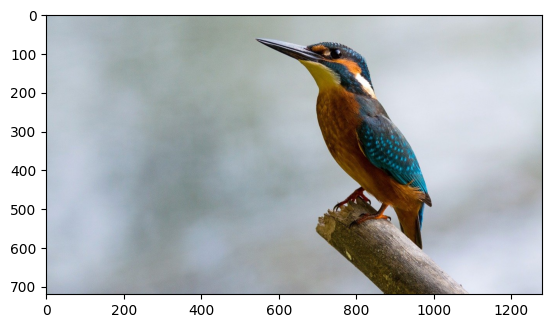

In [63]:
img = cv2.imread('./images/alcedo-atthis-881594_1280.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img, cmap='gray')

2.Постройте градиенты изображений с помощью оператора Лапласа.

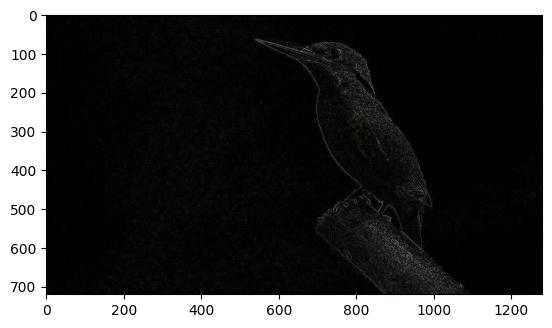

In [45]:
# defind edge of image with operator Laplace
laplacian = cv2.Laplacian(img, -1)
plt.imshow(laplacian)

In [42]:
np.sum(laplacian)

14568364

3. Примените алгоритм детектора краев Кенни.

In [61]:
img.shape

(720, 1280)

(Text(0.5, 1.0, 'Edge Image'), ([], []), ([], []))

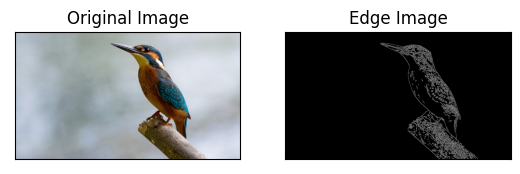

In [64]:
canny = cv2.Canny(img, 100, 200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(canny,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

In [66]:
np.sum(canny)/3

2125340.0